In [1]:
import sys
import hydra
from PIL import Image
from omegaconf import DictConfig
import matplotlib.pyplot as plt
from transformer_ocr.models.model import TransformerOCRCTC

In [2]:
hydra.initialize(config_path="scripts/hydra_cf_144d_4l")
config = hydra.compose("config.yaml")
config

{'dataset': {'dataset': {'name': 'dmec_v6_2', 'train_annotation': 'label_ocr_v5_2_train.txt', 'valid_annotation': 'label_ocr_v5_2_test.txt', 'unchanged': {'root_dir': '/u01/vuh/datasets/OCR', 'img_height': 32, 'img_width_min': 32, 'img_width_max': 1024, 'max_readers': 8}}, 'dataloader': {'num_workers': 4, 'pin_memory': True}, 'aug': {'image_aug': True, 'masked_language_model': False}}, 'model': {'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ', 'device': 'cuda:0', 'batch_size': 256, 'cnn_model': 'vgg19_bn', 'cnn_args': {'pretrained': True, 'stride_pool': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]], 'kernel_pool': [[2, 2], [2, 2], [2, 1], [2, 1], [1, 1]], 'hidden': 144, 'dropout': 0.5}, 'transformer_type': 'conformer', 'transformer_args': {'max_seq_length': 1024, 'n_layers': 4, 'scale': True, 'd_mod

In [3]:
model = TransformerOCRCTC(config=config)

vocab_size 231


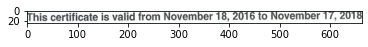

In [8]:
img = Image.open('test_img.png')
plt.imshow(img)

In [9]:
img.size

(663, 24)

In [10]:
ocred_text = model.predict(img)
ocred_text

'This certificate is valid from November 18, 2016 to November 17, 2018'

In [7]:
# model.validation()